In [1]:
import pandas as pd

# Load the dataset- (drugLibTrain_raw.tsv or drugLibTest_raw.tsv).

df = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')

# Display first few rows
print(df.head())


   Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that

In [2]:
# Overview
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Class distribution
print("Condition distribution:")
print(df['condition'].value_counts().head(10))

print("\nRating distribution:")
print(df['rating'].value_counts())

# Create sentiment column (positive: rating >= 7, neutral: 4-6, negative: <=3)
def get_sentiment(rating):
    if rating >= 7:
        return 'positive'
    elif rating <= 3:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['rating'].apply(get_sentiment)

# Sentiment distribution
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB
None
        Unnamed: 0       rating
count  3107.000000  3107.000000
mean   2080.607016     7.006115
std    1187.998828     2.937582
min       0.000000     1.000000
25%    1062.500000     5.000000
50%    2092.000000     8.000000
75%    3092.500000     9.000000
max    4161.000000    10.000000
Unnamed: 0            0
urlDrugN

/tmp/ipython-input-4-1013438100.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette="viridis")


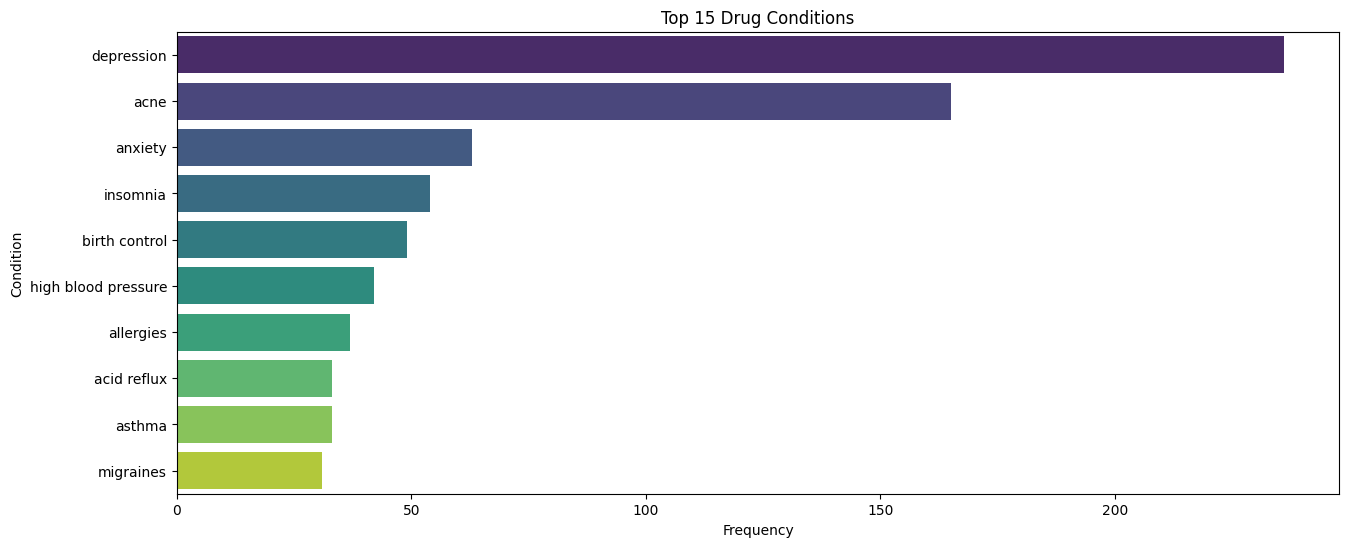

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most frequent conditions
top_conditions = df['condition'].value_counts().nlargest(10)

plt.figure(figsize=(15,6))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette="viridis")
plt.title("Top 15 Drug Conditions")
plt.xlabel("Frequency")
plt.ylabel("Condition")
plt.show()


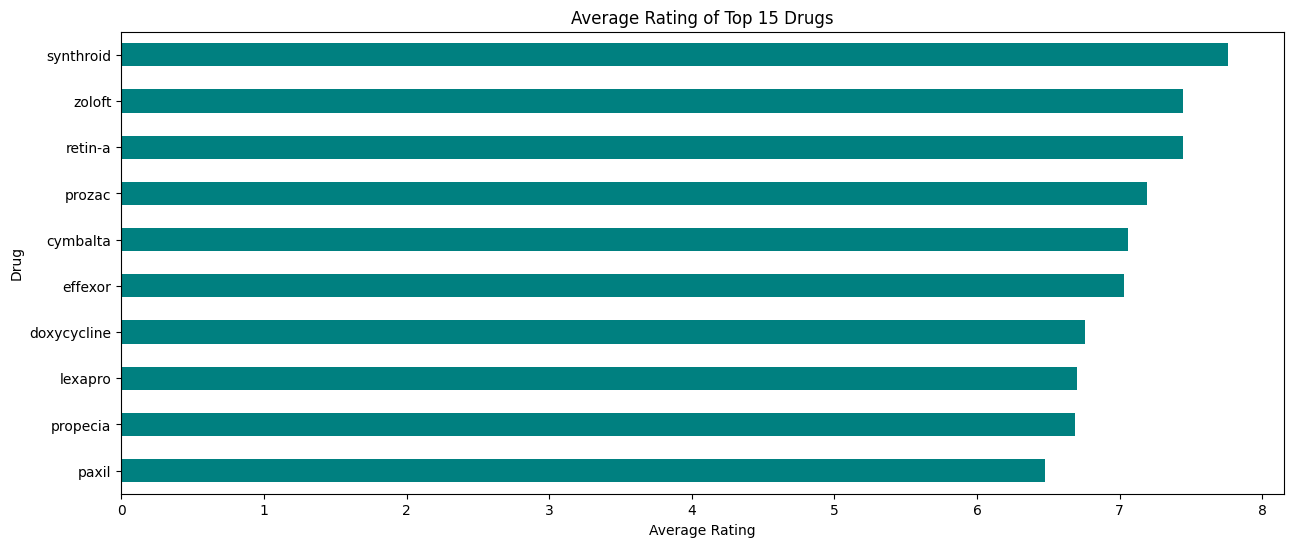

In [7]:
# Average rating per drug (top 10 drugs by count)
top_drugs = df['urlDrugName'].value_counts().nlargest(10).index
avg_ratings = df[df['urlDrugName'].isin(top_drugs)].groupby('urlDrugName')['rating'].mean().sort_values()

plt.figure(figsize=(15,6))
avg_ratings.plot(kind='barh', color='teal')
plt.title("Average Rating of Top 15 Drugs")
plt.xlabel("Average Rating")
plt.ylabel("Drug")
plt.show()

In [16]:

from wordcloud import WordCloud
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['commentsReview'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


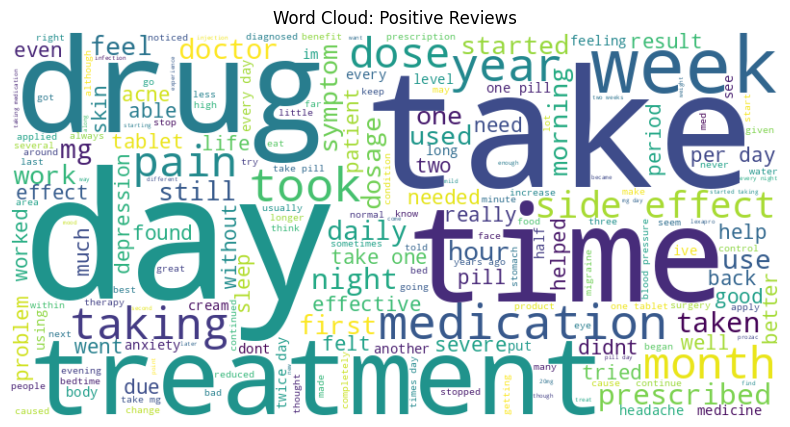

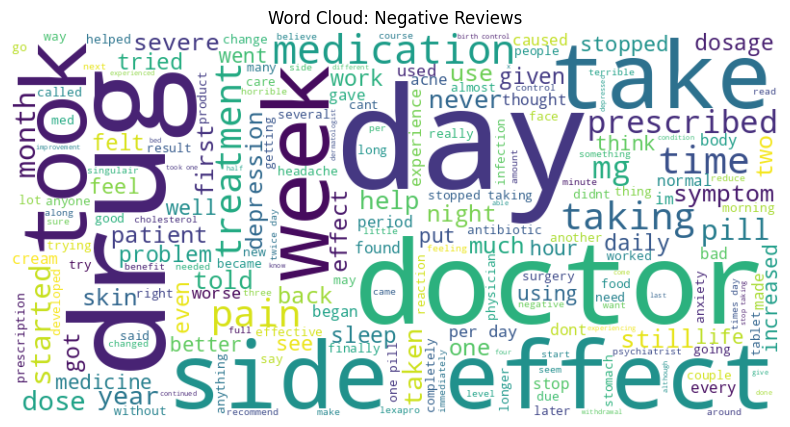

In [18]:
positive_reviews = df[df['sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['sentiment'] == 'negative']['clean_review']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

wc_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Positive Reviews')
plt.show()

wc_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Negative Reviews')
plt.show()

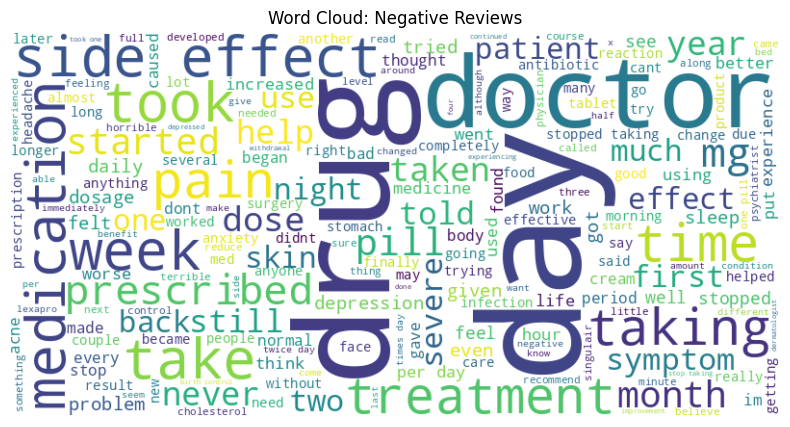

In [19]:
wc_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Negative Reviews')
plt.show()


In [20]:
#Question 2: Classification – Review Sentiment Prediction
import pandas as pd

df = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')

df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 7 else 0)

print(df['sentiment'].value_counts())



sentiment
1    2130
0     977
Name: count, dtype: int64


In [21]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['commentsReview'].apply(preprocess_text)

print(df[['commentsReview', 'clean_review']].head())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                      commentsReview  \
0  monitor blood pressure , weight and asses for ...   
1  I Hate This Birth Control, I Would Not Suggest...   
2  I took 2 pills at the onset of my menstrual cr...   
3  I was given Prilosec prescription at a dose of...   
4                                          See above   

                                        clean_review  
0  monitor blood pressure weight ass resolution f...  
1            hate birth control would suggest anyone  
2  took 2 pill onset menstrual cramp every 812 ho...  
3  given prilosec prescription dose 45mg per day ...  
4                                                see  


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['sentiment']



In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.72      0.15      0.25       184
           1       0.73      0.97      0.84       438

    accuracy                           0.73       622
   macro avg       0.73      0.56      0.54       622
weighted avg       0.73      0.73      0.66       622



In [28]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.65      0.15      0.25       184
           1       0.73      0.97      0.83       438

    accuracy                           0.73       622
   macro avg       0.69      0.56      0.54       622
weighted avg       0.71      0.73      0.66       622



In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='f1', n_jobs=-1)



In [38]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Random Forest Params:", grid_search.best_params_)
y_best_pred = best_model.predict(X_test)

print("Tuned Random Forest Results:")
print(classification_report(y_test, y_best_pred))


Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       184
           1       0.70      1.00      0.83       438

    accuracy                           0.70       622
   macro avg       0.35      0.50      0.41       622
weighted avg       0.50      0.70      0.58       622



In [42]:
import joblib
# Save final model
joblib.dump(grid_search.best_estimator_, 'rf_sentiment_model.pkl')

# Save TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
